In [69]:
import torch
import os
import graphviz

from torchview import draw_graph
from torch import nn
from torchvision import datasets

from crossValidation import (
    model_init_function,
    NUM_CLASSES,
    DATA_TRANSFORMS,
    BATCH_SIZE,
)

In [70]:
# Model Parameters
model_type = "resnet50"
feature_percentage_frozen = 1
classifier_type = 0
if classifier_type == 0:
    model_final_struc = []
    model_final_in = NUM_CLASSES
elif classifier_type == 1:
    model_final_struc = [
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(512, 128),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(128, NUM_CLASSES),
    ]
    model_final_in = 512
elif classifier_type == 2:
    model_final_struc = [nn.ReLU(), nn.Dropout(), nn.Linear(128, NUM_CLASSES)]
    model_final_in = 128
elif classifier_type == 3:
    model_final_struc = [
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(2048, 2048),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(2048, NUM_CLASSES),
    ]
    model_final_in = 2048

data_dir = "../data/classification/"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

image_datasets = {
    x: datasets.ImageFolder(data_dir + x, DATA_TRANSFORMS[x])
    for x in ["train", "test"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "test"]}
data_loaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=10
    )
    for x in ["train", "test"]
}

model, _, _, _ = model_init_function(
    model_type,
    model_final_struc,
    model_final_in,
    device,
    feature_percentage_frozen=feature_percentage_frozen,
)

inputs, labels = next(iter(data_loaders["train"]))
inputs.to(device)
yhat = model(inputs)

In [71]:
graphviz.set_jupyter_format("png")

'png'

In [72]:
model.fc

Sequential(
  (0): Linear(in_features=2048, out_features=5, bias=True)
)

In [73]:
model_graph1 = draw_graph(model.fc, input_size=(1, 2048))

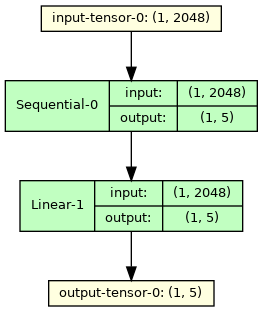

In [74]:
model_graph1.visual_graph